# Importing useful Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [9]:

import tensorflow
print (tensorflow.__version__)

2.15.0


# Download and show dataset

11490434/11490434 [==============================] - 2s 0us/step
Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


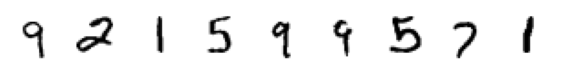

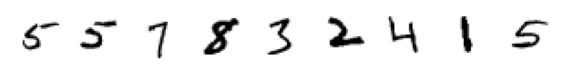

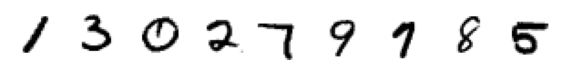

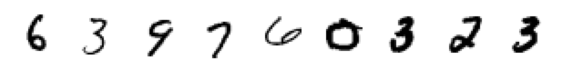

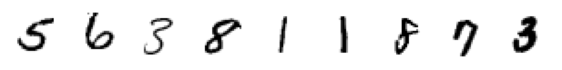

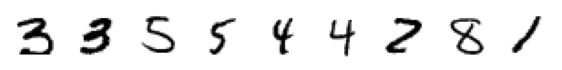

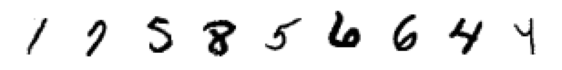

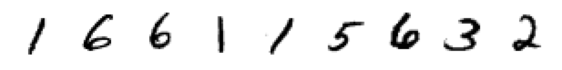

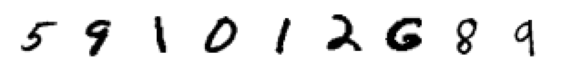

In [10]:
from tensorflow.keras.datasets import fashion_mnist, mnist

(trainX, trainY), (testX, testY) = mnist.load_data()

print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testY.shape))


for k in range(9):
    plt.figure(figsize=(7, 7))
    for j in range(9):
        i = np.random.randint(0, 10000)
        plt.subplot(990 + 1 + j)
        plt.imshow(trainX[i], cmap='gray_r')
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

# Data Normalization

In [11]:
trainX = [image/255.0 for image in trainX]
testX = [image/255.0 for image in testX]

trainX = np.reshape(trainX, (60000, 28, 28, 1))
testX = np.reshape(testX, (10000, 28, 28, 1))

print (trainX.shape, testX.shape, trainY.shape, testY.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


# Define Generator Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Reshape, Activation

# Create the generator model
generator_network = Sequential()

# Add dense layers with batch normalization
generator_network.add(Dense(1200, activation='relu', input_shape=(50,)))
generator_network.add(BatchNormalization(momentum=0.8))
generator_network.add(Dense(1000, activation='relu'))
generator_network.add(BatchNormalization(momentum=0.8))
generator_network.add(Dense(28 * 28))

# Reshape the output to the desired image dimensions
generator_network.add(Reshape((28, 28, 1)))

# Add the activation layer
generator_network.add(Activation('sigmoid'))

# Print the model summary
generator_network.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1200)              61200     
                                                                 
 batch_normalization_2 (Bat  (None, 1200)              4800      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 1000)              1201000   
                                                                 
 batch_normalization_3 (Bat  (None, 1000)              4000      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 784)               784784    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)        

# Define Discriminator Network

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation

# Create the discriminator model
discriminator_network = Sequential()

# Add layers to the model
discriminator_network.add(Flatten(input_shape=(28, 28, 1)))
discriminator_network.add(Dense(256, activation='relu'))
discriminator_network.add(Dropout(0.3))
discriminator_network.add(Dense(128, activation='relu'))
discriminator_network.add(Dropout(0.5))
discriminator_network.add(Dense(1))
discriminator_network.add(Activation('sigmoid'))

# Print the model summary
discriminator_network.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
 activation_3 (Activation)   (None, 1)                

In [22]:
import tensorflow
adam_optimizer = tensorflow.keras.optimizers.legacy.Adam(learning_rate=0.00005, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# GAN, Defining combined model

In [23]:
discriminator_network.trainable=False
random_input = tensorflow.keras.layers.Input(shape=(50,))
g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

gan_model = tensorflow.keras.models.Model(random_input, d_output)
gan_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 sequential_2 (Sequential)   (None, 28, 28, 1)         2055784   
                                                                 
 sequential_3 (Sequential)   (None, 1)                 233985    
                                                                 
Total params: 2289769 (8.73 MB)
Trainable params: 2051384 (7.83 MB)
Non-trainable params: 238385 (931.19 KB)
_________________________________________________________________


# Compiling GAN

In [24]:
gan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [25]:
# Indices of Zero Images
indices = [i for i in range(len(trainX))]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size)
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = trainX[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(7, 7))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j,:,:,-1], cmap='gray_r')
            plt.axis('off')
            #plt.title(trainY[i])
        plt.show()
    return

# Training GAN

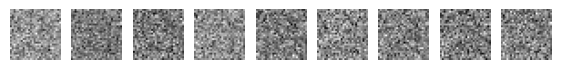

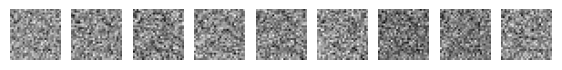

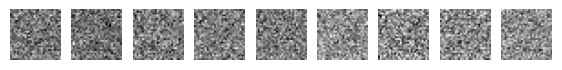

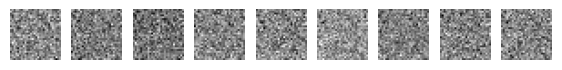

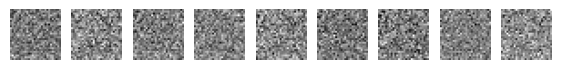

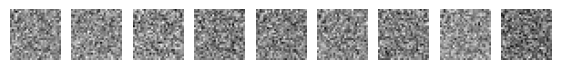

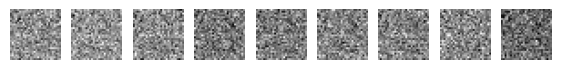

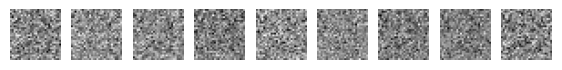

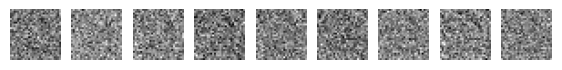

Epoch:0, Step:0, D-Loss:0.656, D-Acc:61.000, G-Loss:1.054
Epoch:0, Step:50, D-Loss:0.733, D-Acc:49.000, G-Loss:1.007
Epoch:0, Step:100, D-Loss:0.694, D-Acc:57.000, G-Loss:0.841
Epoch:0, Step:150, D-Loss:0.810, D-Acc:44.000, G-Loss:0.725
Epoch:0, Step:200, D-Loss:0.805, D-Acc:48.000, G-Loss:0.621
Epoch:0, Step:250, D-Loss:0.882, D-Acc:46.000, G-Loss:0.557
Epoch:0, Step:300, D-Loss:1.015, D-Acc:33.000, G-Loss:0.466
Epoch:0, Step:350, D-Loss:1.070, D-Acc:35.000, G-Loss:0.373
Epoch:0, Step:400, D-Loss:1.208, D-Acc:30.000, G-Loss:0.336
Epoch:0, Step:450, D-Loss:1.382, D-Acc:27.000, G-Loss:0.296
Epoch:1, Step:0, D-Loss:1.414, D-Acc:27.000, G-Loss:0.272
Epoch:1, Step:50, D-Loss:1.393, D-Acc:27.000, G-Loss:0.225
Epoch:1, Step:100, D-Loss:1.549, D-Acc:24.000, G-Loss:0.188
Epoch:1, Step:150, D-Loss:1.540, D-Acc:28.000, G-Loss:0.247
Epoch:1, Step:200, D-Loss:1.609, D-Acc:24.000, G-Loss:0.154
Epoch:1, Step:250, D-Loss:1.622, D-Acc:21.000, G-Loss:0.144
Epoch:1, Step:300, D-Loss:1.707, D-Acc:18.000,

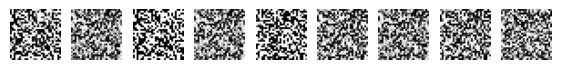

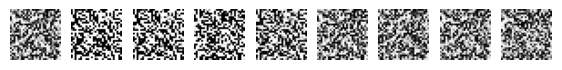

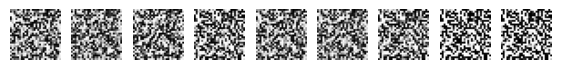

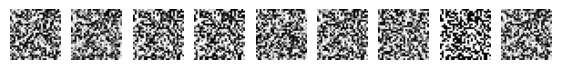

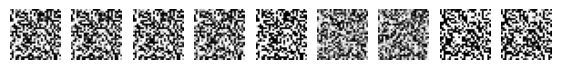

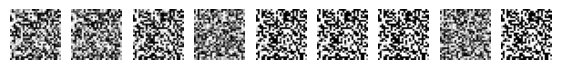

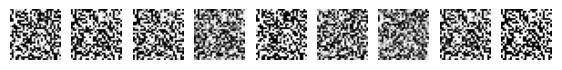

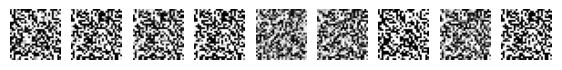

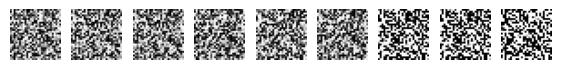

Epoch:10, Step:0, D-Loss:3.162, D-Acc:19.000, G-Loss:0.020
Epoch:10, Step:50, D-Loss:3.453, D-Acc:22.000, G-Loss:0.019
Epoch:10, Step:100, D-Loss:3.286, D-Acc:27.000, G-Loss:0.019
Epoch:10, Step:150, D-Loss:3.306, D-Acc:20.000, G-Loss:0.017
Epoch:10, Step:200, D-Loss:3.119, D-Acc:20.000, G-Loss:0.014
Epoch:10, Step:250, D-Loss:3.113, D-Acc:24.000, G-Loss:0.019
Epoch:10, Step:300, D-Loss:3.170, D-Acc:25.000, G-Loss:0.021
Epoch:10, Step:350, D-Loss:3.483, D-Acc:31.000, G-Loss:0.016
Epoch:10, Step:400, D-Loss:3.549, D-Acc:17.000, G-Loss:0.022
Epoch:10, Step:450, D-Loss:3.519, D-Acc:26.000, G-Loss:0.027
Epoch:11, Step:0, D-Loss:3.274, D-Acc:16.000, G-Loss:0.026
Epoch:11, Step:50, D-Loss:3.589, D-Acc:29.000, G-Loss:0.023
Epoch:11, Step:100, D-Loss:3.410, D-Acc:21.000, G-Loss:0.022
Epoch:11, Step:150, D-Loss:3.456, D-Acc:20.000, G-Loss:0.016
Epoch:11, Step:200, D-Loss:3.236, D-Acc:25.000, G-Loss:0.016
Epoch:11, Step:250, D-Loss:3.521, D-Acc:24.000, G-Loss:0.015
Epoch:11, Step:300, D-Loss:3.2

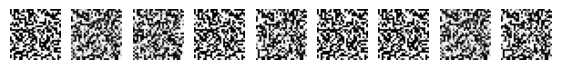

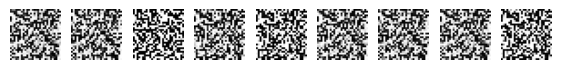

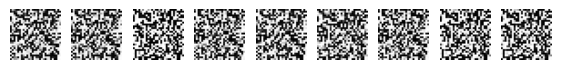

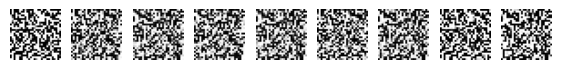

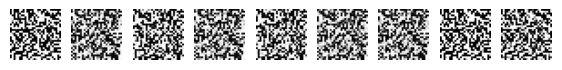

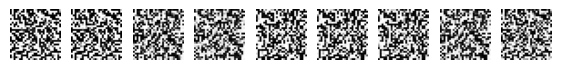

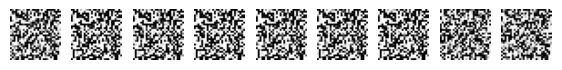

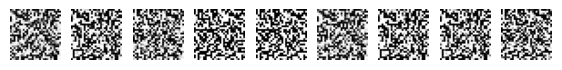

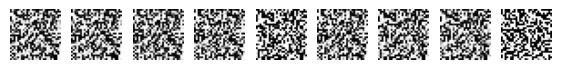

Epoch:20, Step:0, D-Loss:4.328, D-Acc:24.000, G-Loss:0.003
Epoch:20, Step:50, D-Loss:4.584, D-Acc:21.000, G-Loss:0.004
Epoch:20, Step:100, D-Loss:4.401, D-Acc:25.000, G-Loss:0.001
Epoch:20, Step:150, D-Loss:4.387, D-Acc:20.000, G-Loss:0.002
Epoch:20, Step:200, D-Loss:4.389, D-Acc:24.000, G-Loss:0.002
Epoch:20, Step:250, D-Loss:4.576, D-Acc:16.000, G-Loss:0.003
Epoch:20, Step:300, D-Loss:4.364, D-Acc:19.000, G-Loss:0.002
Epoch:20, Step:350, D-Loss:4.376, D-Acc:21.000, G-Loss:0.004
Epoch:20, Step:400, D-Loss:4.566, D-Acc:21.000, G-Loss:0.003
Epoch:20, Step:450, D-Loss:4.321, D-Acc:21.000, G-Loss:0.001
Epoch:21, Step:0, D-Loss:4.589, D-Acc:25.000, G-Loss:0.004
Epoch:21, Step:50, D-Loss:4.799, D-Acc:19.000, G-Loss:0.001
Epoch:21, Step:100, D-Loss:4.642, D-Acc:21.000, G-Loss:0.002
Epoch:21, Step:150, D-Loss:4.928, D-Acc:19.000, G-Loss:0.001


KeyboardInterrupt: 

In [26]:
epochs = 200
batch_size = 100
steps = 500
noise_size = 50
# Before the training loop, build the optimizer with the model's trainable variables
optimizer.build(generator_network.trainable_variables + discriminator_network.trainable_variables)

losses_d = []
losses_g = []

for i in range(0, epochs):
    if (i%10 == 0):
        show_generator_results(generator_network)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))

        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))

        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)

        gan_input = get_random_noise(batch_size, noise_size)

        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))

        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = gan_model.train_on_batch(gan_input, gan_output)

        losses_d.append(loss_d[0])
        losses_g.append(loss_g)

        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))

# Show Results

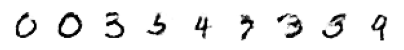

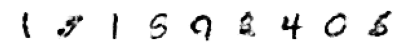

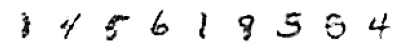

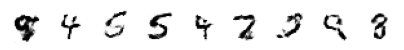

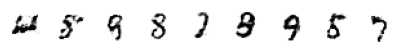

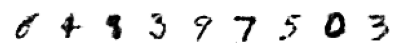

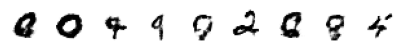

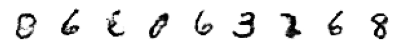

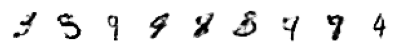

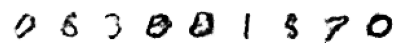

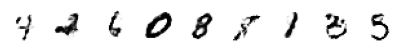

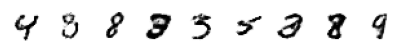

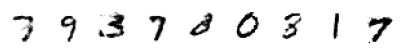

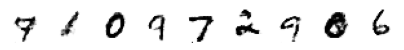

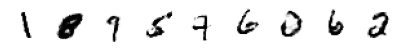

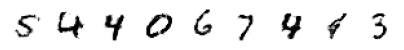

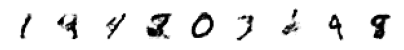

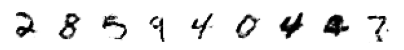

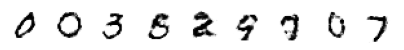

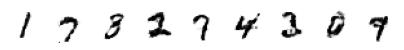

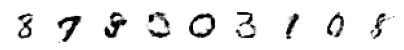

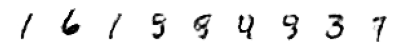

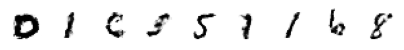

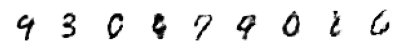

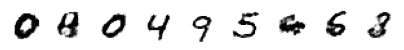

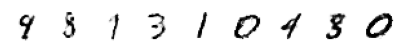

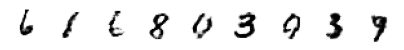

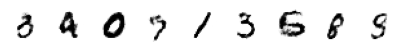

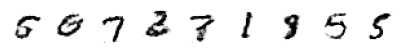

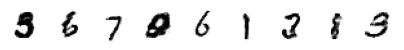

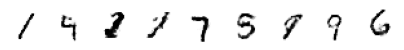

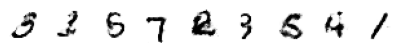

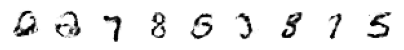

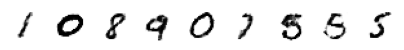

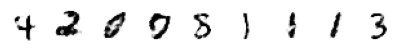

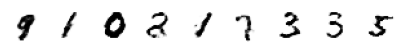

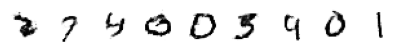

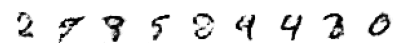

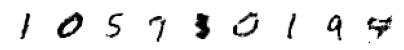

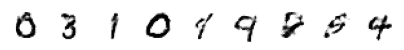

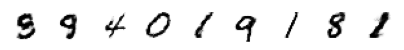

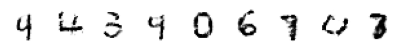

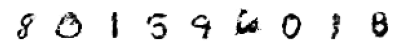

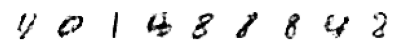

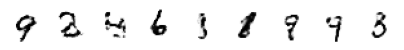

In [ ]:
#Generating Unlimited samples
for i in range(5):
    show_generator_results(generator_network)

# Plot GAN loss

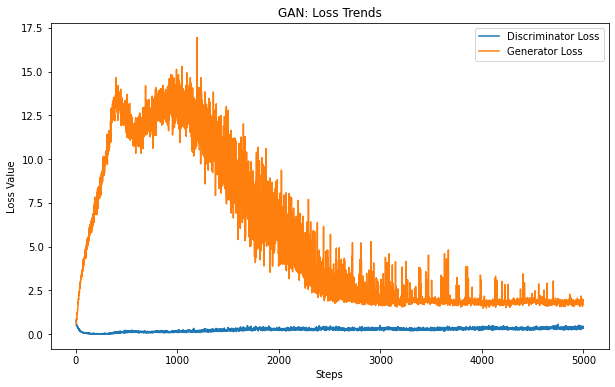

In [ ]:
steps = [i for i in range(len(losses_d))]
plt.figure(figsize=(10, 6))
plt.plot(losses_d[:5000])
plt.plot(losses_g[:5000])
plt.xlabel('Steps')
plt.ylabel('Loss Value')
plt.title("GAN: Loss Trends")
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.show()